# Mid-Term Project: Business Problem Solving with Binary Classification

## Introduction:
After the COVID-19 pandemic, the way people view their jobs has changed significantly. Employees now expect more flexibility, better career growth, and a healthy work-life balance. As a result, many companies are experiencing higher employee turnover, as people leave jobs more frequently due to dissatisfaction with pay, benefits, or working conditions.

Employee attrition refers to the gradual reduction of a company’s workforce when employees leave faster than they are replaced. This can happen due to retirements, resignations, or decisions not to fill vacant roles. Factors like dissatisfaction with benefits, limited career development, or unfavorable work conditions often drive attrition. Additionally, as industries evolve, some roles may become obsolete, leading companies to be more selective in replacing them.

Keeping track of attrition rates is crucial because high turnover can lead to significant problems for organizations. Losing valuable employees results in talent loss, lower productivity, increased hiring costs, and a negative impact on team morale. Furthermore, frequent departures can disrupt operations and affect the company’s overall performance. By closely monitoring the attrition rate, businesses can spot trends early, identify potential issues, and take proactive steps to retain top talent.

Analyzing attrition helps businesses understand the reasons behind employee departures and implement strategies to improve retention. Whether voluntary (resignations) or involuntary (layoffs), both types of attrition can have a serious impact on company performance. This analysis will focus on voluntary attrition, uncovering the reasons behind employee exits and exploring ways to prevent them, ultimately promoting a stable and engaged workforce.

## Objective:
In this project, we will use the **HR Employee Attrition** dataset to predict employee turnover (whether employees will leave or stay in the company). The dataset includes various features about employees such as age, salary, job role, and job satisfaction. The target variable, **Attrition**, is a binary variable with two possible outcomes: "Yes" or "No."

We will apply Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC) models to solve this business problem and evaluate them using various metrics.

---

## 1. Dataset Selection and Business Problem Definition

In this project, we are using the **HR Employee Attrition** dataset, which is publicly available on Kaggle. The dataset contains records about employees, such as demographic data, job satisfaction, performance, and more, with the goal of predicting **employee attrition** (whether an employee will leave the company or not).

- **Dataset Source**: [HR Employee Attrition Dataset](https://www.kaggle.com/datasets/gauravduttakiit/hr-employee-attrition)
- **Binary Target Variable**: `Attrition` (Yes/No)

### Business Problem

Employee attrition is a significant challenge for companies because losing employees leads to increased costs in recruiting, training, and loss of valuable knowledge and experience. The goal of this project is to predict employee turnover, allowing HR departments to take proactive steps to retain high-performing employees.

The key question is: **Can we predict which employees are likely to leave based on their data?**

### Dataset Description:
The dataset contains 35 columns representing various attributes related to employee demographics, job performance, satisfaction, and more. Some key columns include:

- **Age:** Age of the employee
- **Attrition:** Whether the employee has left the company (Yes or No)
- **BusinessTravel:** Frequency of business travel (e.g., Rarely, Frequently)
- **DailyRate:** Daily salary rate of the employee
- **Department:** Department where the employee works (e.g., Sales, Research & Development)
- **DistanceFromHome:** Distance from the employee's home to the workplace
- **Education:** Level of education (numeric scale)
- **EducationField:** Field of education (e.g., Life Sciences, Medical)
- **EmployeeCount:** Number of employees (appears to be constant at 1)
- **EmployeeNumber:** Unique identifier for each employee
- **EnvironmentSatisfaction:** Satisfaction with the work environment (numeric scale)
- **Gender:** Gender of the employee
- **HourlyRate:** Hourly pay rate of the employee
- **JobInvolvement:** Involvement in the job (numeric scale)
- **JobLevel:** Employee job level (numeric scale)
- **JobRole:** Specific role within the company (e.g., Sales Executive, Research Scientist)
- **JobSatisfaction:** Satisfaction with the job (numeric scale)
- **MaritalStatus:** Marital status of the employee (e.g., Single, Married)
- **MonthlyIncome:** Monthly income of the employee
- **MonthlyRate:** Monthly salary rate of the employee
- **NumCompaniesWorked:** Number of companies the employee has worked for
- **Over18:** Whether the employee is over 18 (appears to be constant)
- **OverTime:** Whether the employee works overtime (Yes or No)
- **PercentSalaryHike:** Percentage increase in salary
- **PerformanceRating:** Employee performance rating (numeric scale)
- **RelationshipSatisfaction:** Satisfaction with relationships at work (numeric scale)
- **StandardHours:** Standard hours of work (appears to be constant)
- **StockOptionLevel:** Stock option level of the employee
- **TotalWorkingYears:** Total number of years the employee has worked
- **TrainingTimesLastYear:** Number of training sessions attended in the last year
- **WorkLifeBalance:** Work-life balance rating (numeric scale)
- **YearsAtCompany:** Number of years the employee has worked at the company
- **YearsInCurrentRole:** Number of years the employee has been in their current role
- **YearsSinceLastPromotion:** Number of years since the employee's last promotion
- **YearsWithCurrManager:** Number of years the employee has worked with their current manager

---

## 2. Import all libraries needed

In [1]:
### Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Interpretation:
This block imports the necessary libraries for data manipulation, visualization, preprocessing, model building, and evaluation.

--- 

## 3. Data Exploration:

In [2]:
# Load the dataset
file_path = 'C:/Users/Abhijith Nallana/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

### Interpretation:

This block loads the HR Employee Attrition dataset from a CSV file and displays the first few rows. The dataset contains features related to employee demographics, job satisfaction, and performance, with the target variable being Attrition (Yes/No), which indicates whether an employee left the company.

In [3]:
# Summary statistics for numerical features
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

### Interpretation:

This block provides summary statistics for numerical features, showing the range and distribution of values such as age, salary, and years at company. This helps in understanding the overall characteristics of the dataset and identifying any potential outliers.

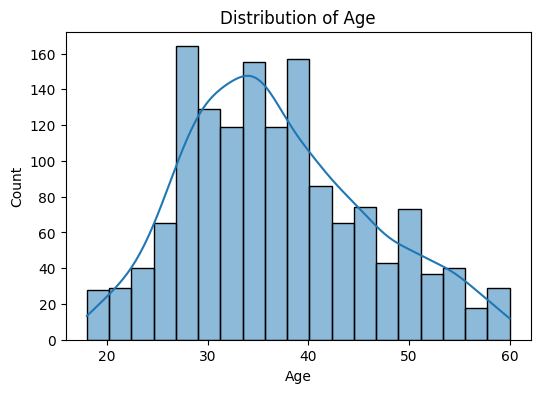

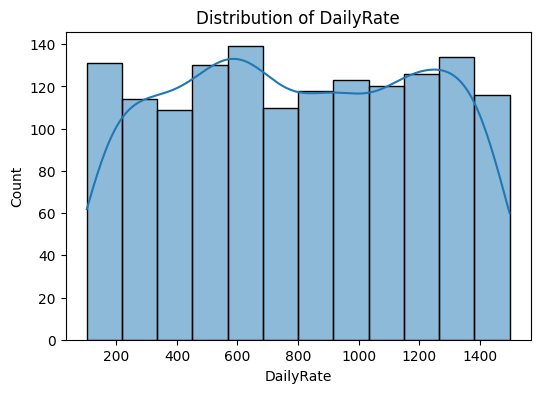

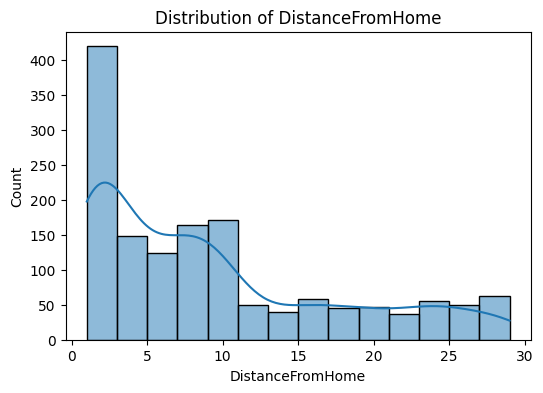

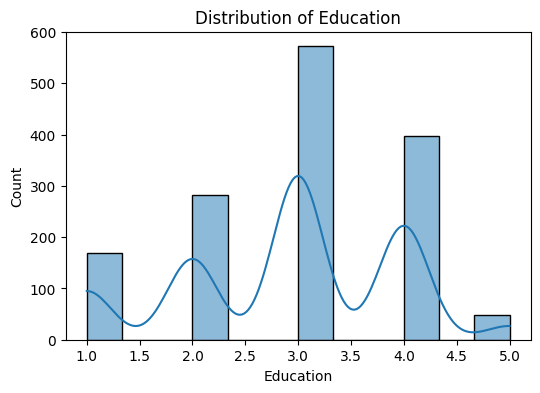

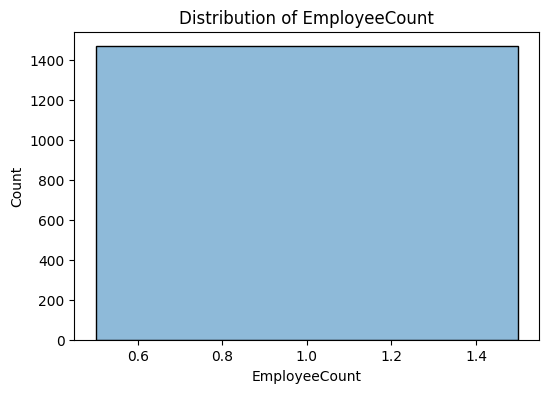

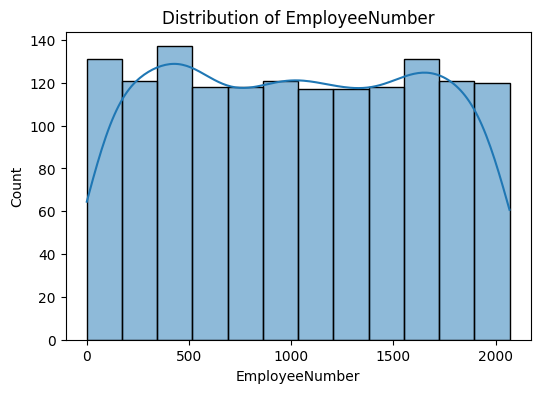

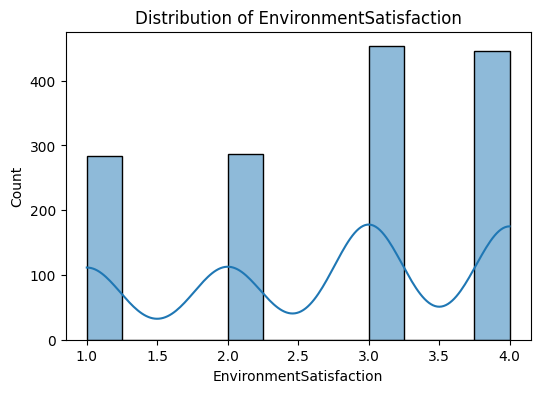

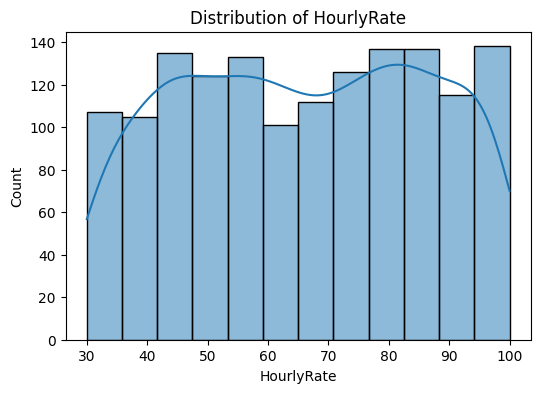

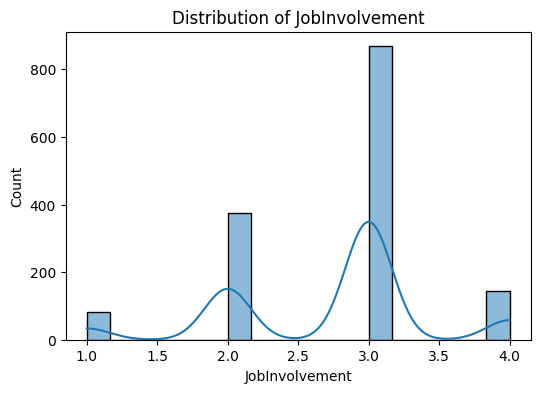

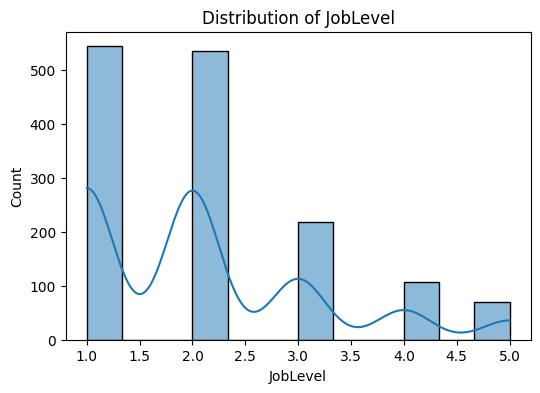

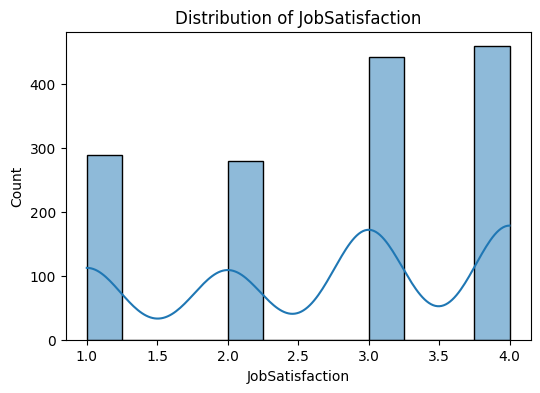

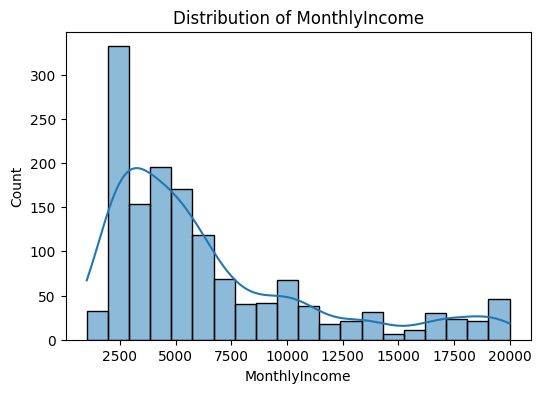

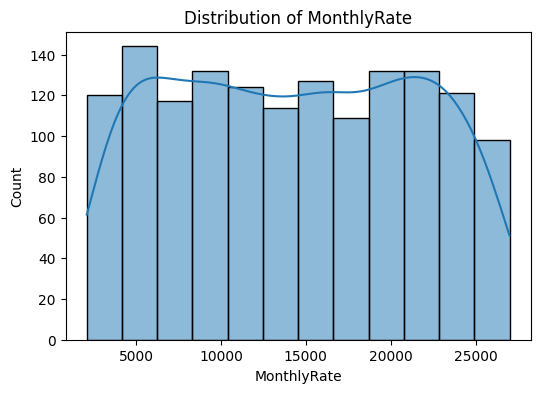

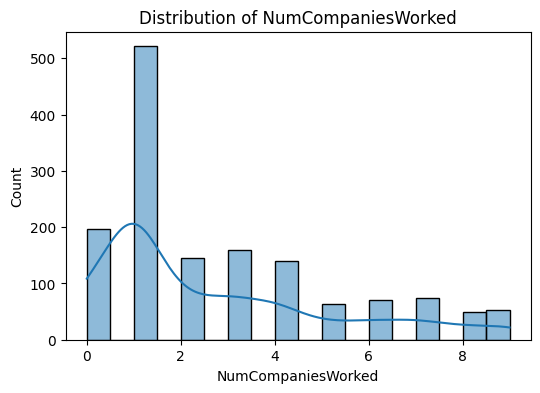

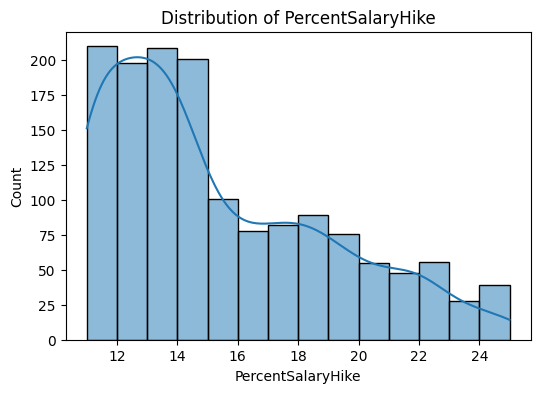

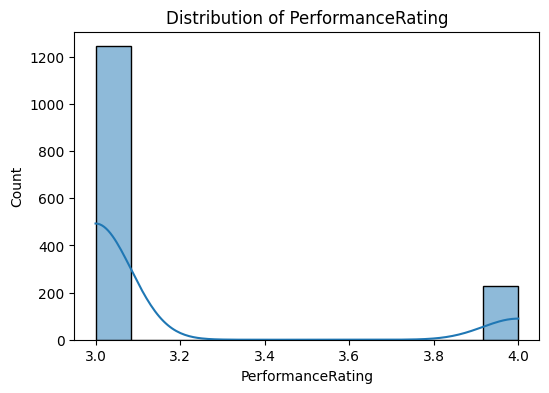

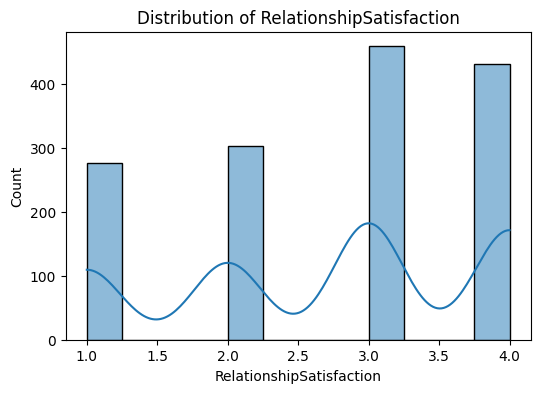

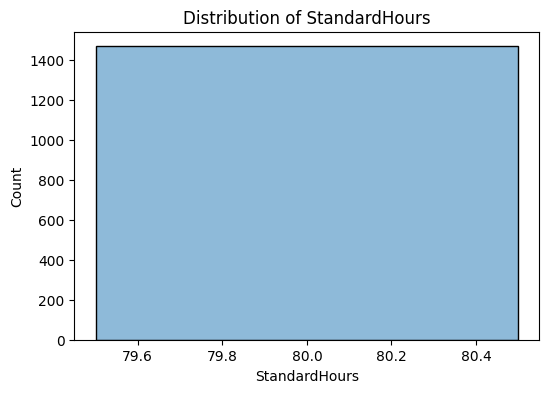

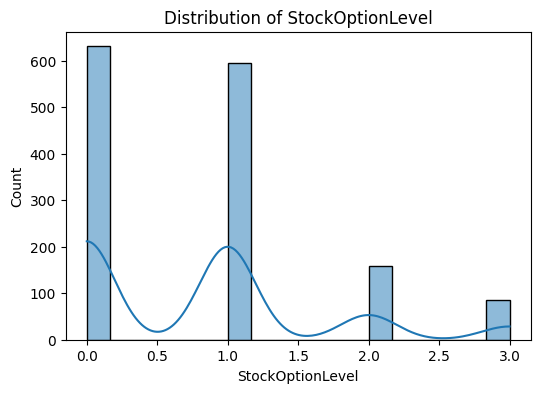

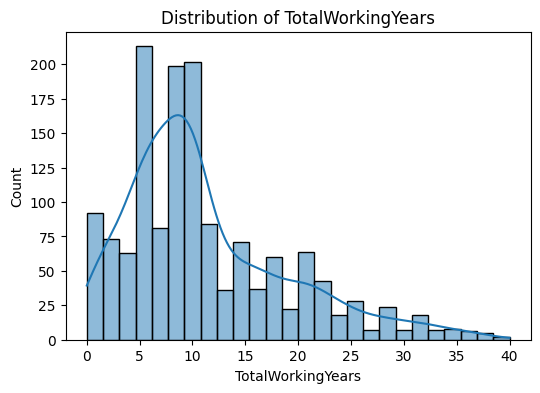

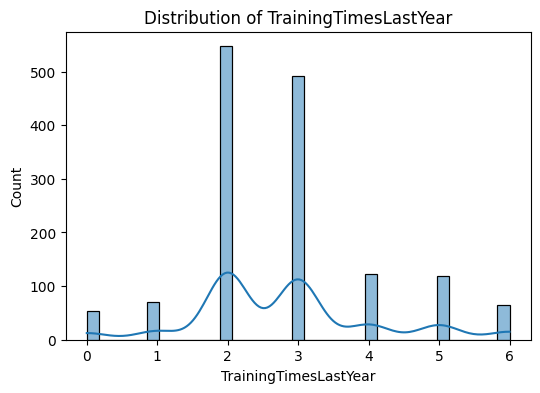

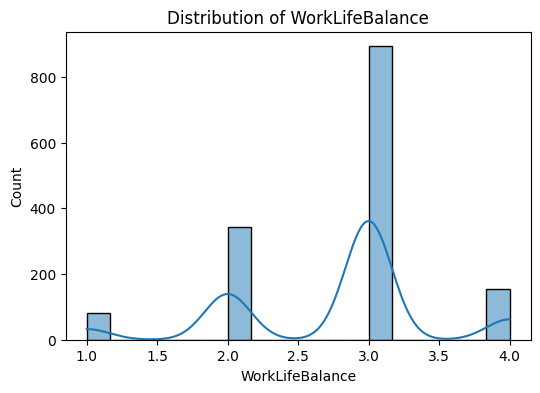

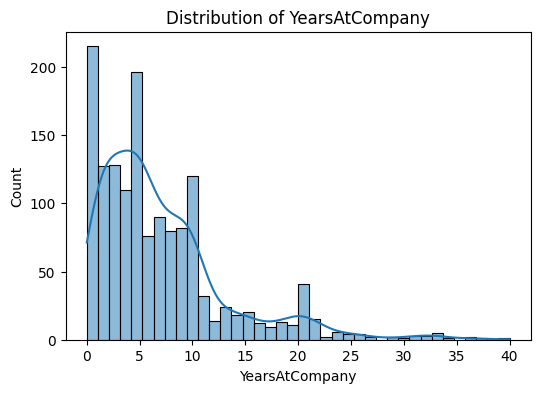

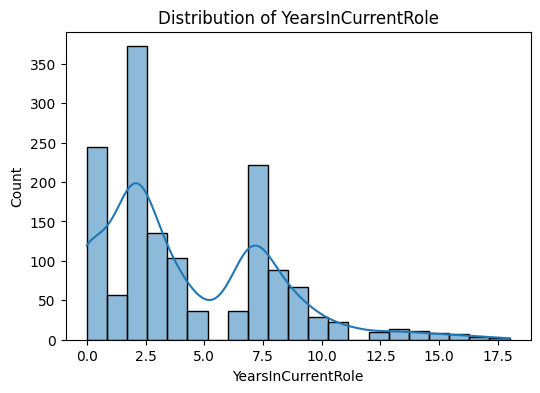

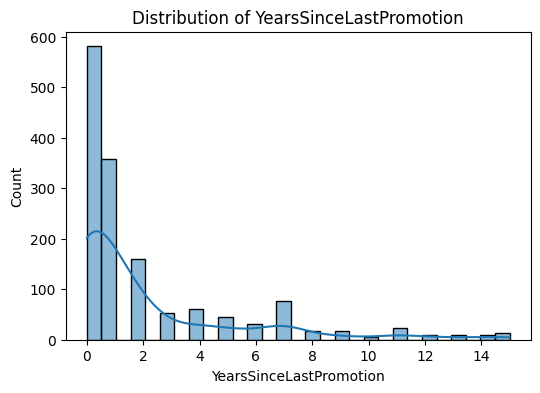

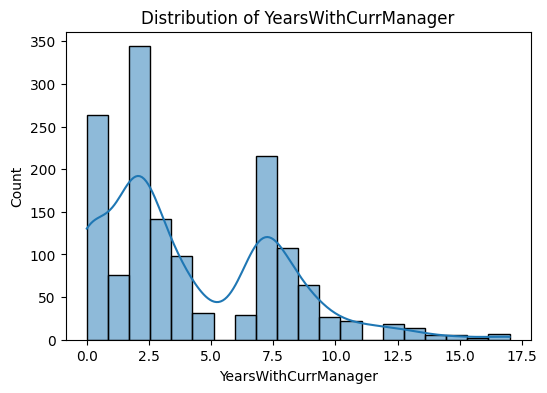

In [4]:
# Distribution plots for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### Interpretation:

These graphs illustrate the distribution of various numerical features in the dataset. For each feature:

- **Age:** Younger employees, especially in their 20s, show higher attrition due to exploring new opportunities.
- **Distance from Home:** Employees living further (10+ km) have a higher risk of leaving due to commuting dissatisfaction.
- **Job/Environment Satisfaction:** Low satisfaction correlates with increased attrition.
- **Monthly Income:** Lower-income employees feel undercompensated, increasing attrition risk.
- **Years Since Last Promotion:** Limited career advancement leads to higher turnover.
- **Years at Company**: Newer employees (0-5 years) are more likely to leave.
- **Training:** Minimal training contributes to attrition due to limited development opportunities.



---

## 3.1. Handling Missing Values and Encoding Categorical Data

In [5]:
# Looking for missing values
missing_values = data.isna().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Interpretation:
Since there are no missing values, the dataset is complete, allowing us to proceed directly with model building without any imputation or removal of data. This ensures that our analysis uses the entire dataset, providing reliable and unbiased results.

---

## 3.2. Display Unique Categories:

In [6]:
# Extract numerical and categorical columns from the dataset

# Extract numerical columns (dtype float64 or int64)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Extract categorical columns (dtype object)
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert them to lists if you need to work with the column names
numerical_columns_list = list(numerical_columns)
categorical_columns_list = list(categorical_columns)

# Display the results
print("Numerical Columns:")
print(numerical_columns_list)

print("\nCategorical Columns:")
print(categorical_columns_list)

# Extract and display unique categories in each categorical column
print("\nUnique Categories in Each Categorical Column:")
for column in categorical_columns_list:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical Columns:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Unique Categories in Each Categorical Column:
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole:

### Interpretation:
This block extracts and displays the numerical and categorical columns from a dataset:

- **Numerical Columns:** Identifies and extracts columns with numerical data types (e.g., float64, int64).
- **Categorical Columns:** Identifies and extracts columns with categorical data types (e.g., object).
- The script converts both the numerical and categorical columns to lists for easier manipulation.
- It also prints a list of unique categories for each categorical column, providing insight into the data distribution.
  
---

## 3.3. Define Mappings for Categorical Columns:

In [7]:
# Define the mappings for categorical columns
# Mapping values for the column 'BusinessTravel'
BusinessTravel_mapping = {
    'Travel_Rarely': 0,
    'Travel_Frequently': 1,
    'Non-Travel': 2
}

# Mapping values for the column 'Department'
Department_mapping = {
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
}

# Mapping values for the column 'EducationField'
EducationField_mapping = {
    'Life Sciences': 0,
    'Other': 1,
    'Medical': 2,
    'Marketing': 3,
    'Technical Degree': 4,
    'Human Resources': 5,
}

# Mapping values for the column 'Gender'
Gender_mapping = {
    'Female': 0,
    'Male': 1
}

# Mapping values for the column 'JobRole'
JobRole_mapping = {
     'Sales Executive': 0,
     'Research Scientist': 1,
     'Laboratory Technician': 2,
     'Manufacturing Director': 3,
     'Healthcare Representative': 4,
     'Manager': 5,
     'Sales Representative': 6,
     'Research Director': 7,
     'Human Resources': 8
}

# Mapping values for the column 'MaritalStatus'
MaritalStatus_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}

# Mapping values for 'YN_mapping' (Yes/No columns)
YN_mapping = {
    'No': 0,
    'Yes': 1,
    'Y': 1,
}

### Interpretation:

This code defines mappings for several categorical columns, converting text-based categories into numerical values for machine learning algorithms:

- **BusinessTravel, Department, EducationField, Gender, JobRole, and MaritalStatus:** Each categorical value is mapped to a unique number.
- **YN_mapping:** Maps 'Yes'/'No' responses to binary values (0 and 1).
  
These mappings are essential for transforming categorical data into numerical form, which allows machine learning models to process and learn from these features. This step is part of the data preprocessing pipeline.

---

## 3.4. Mapping Categorical Variables:

In [8]:
# Apply mappings to the respective columns in data
data['BusinessTravel'] = data['BusinessTravel'].map(BusinessTravel_mapping)
data['Department'] = data['Department'].map(Department_mapping)
data['EducationField'] = data['EducationField'].map(EducationField_mapping)
data['Gender'] = data['Gender'].map(Gender_mapping)
data['JobRole'] = data['JobRole'].map(JobRole_mapping)
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_mapping)

# Apply YN_mapping to columns with Yes/No values
data['Attrition'] = data['Attrition'].map(YN_mapping)
data['Over18'] = data['Over18'].map(YN_mapping)
data['OverTime'] = data['OverTime'].map(YN_mapping)

print(data.head(10))

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               0       1102           0                 1   
1   49          0               1        279           1                 8   
2   37          1               0       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               0        591           1                 2   
5   32          0               1       1005           1                 2   
6   59          0               0       1324           1                 3   
7   30          0               0       1358           1                24   
8   38          0               1        216           1                23   
9   36          0               0       1299           1                27   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               0              1               1  ...   
1    

### Interpretation:
Mapping categorical variables transforms them into numerical values while preserving the meaning of each category. This process is essential because most machine learning models cannot work with non-numeric data directly.

---

### Correlation Plot

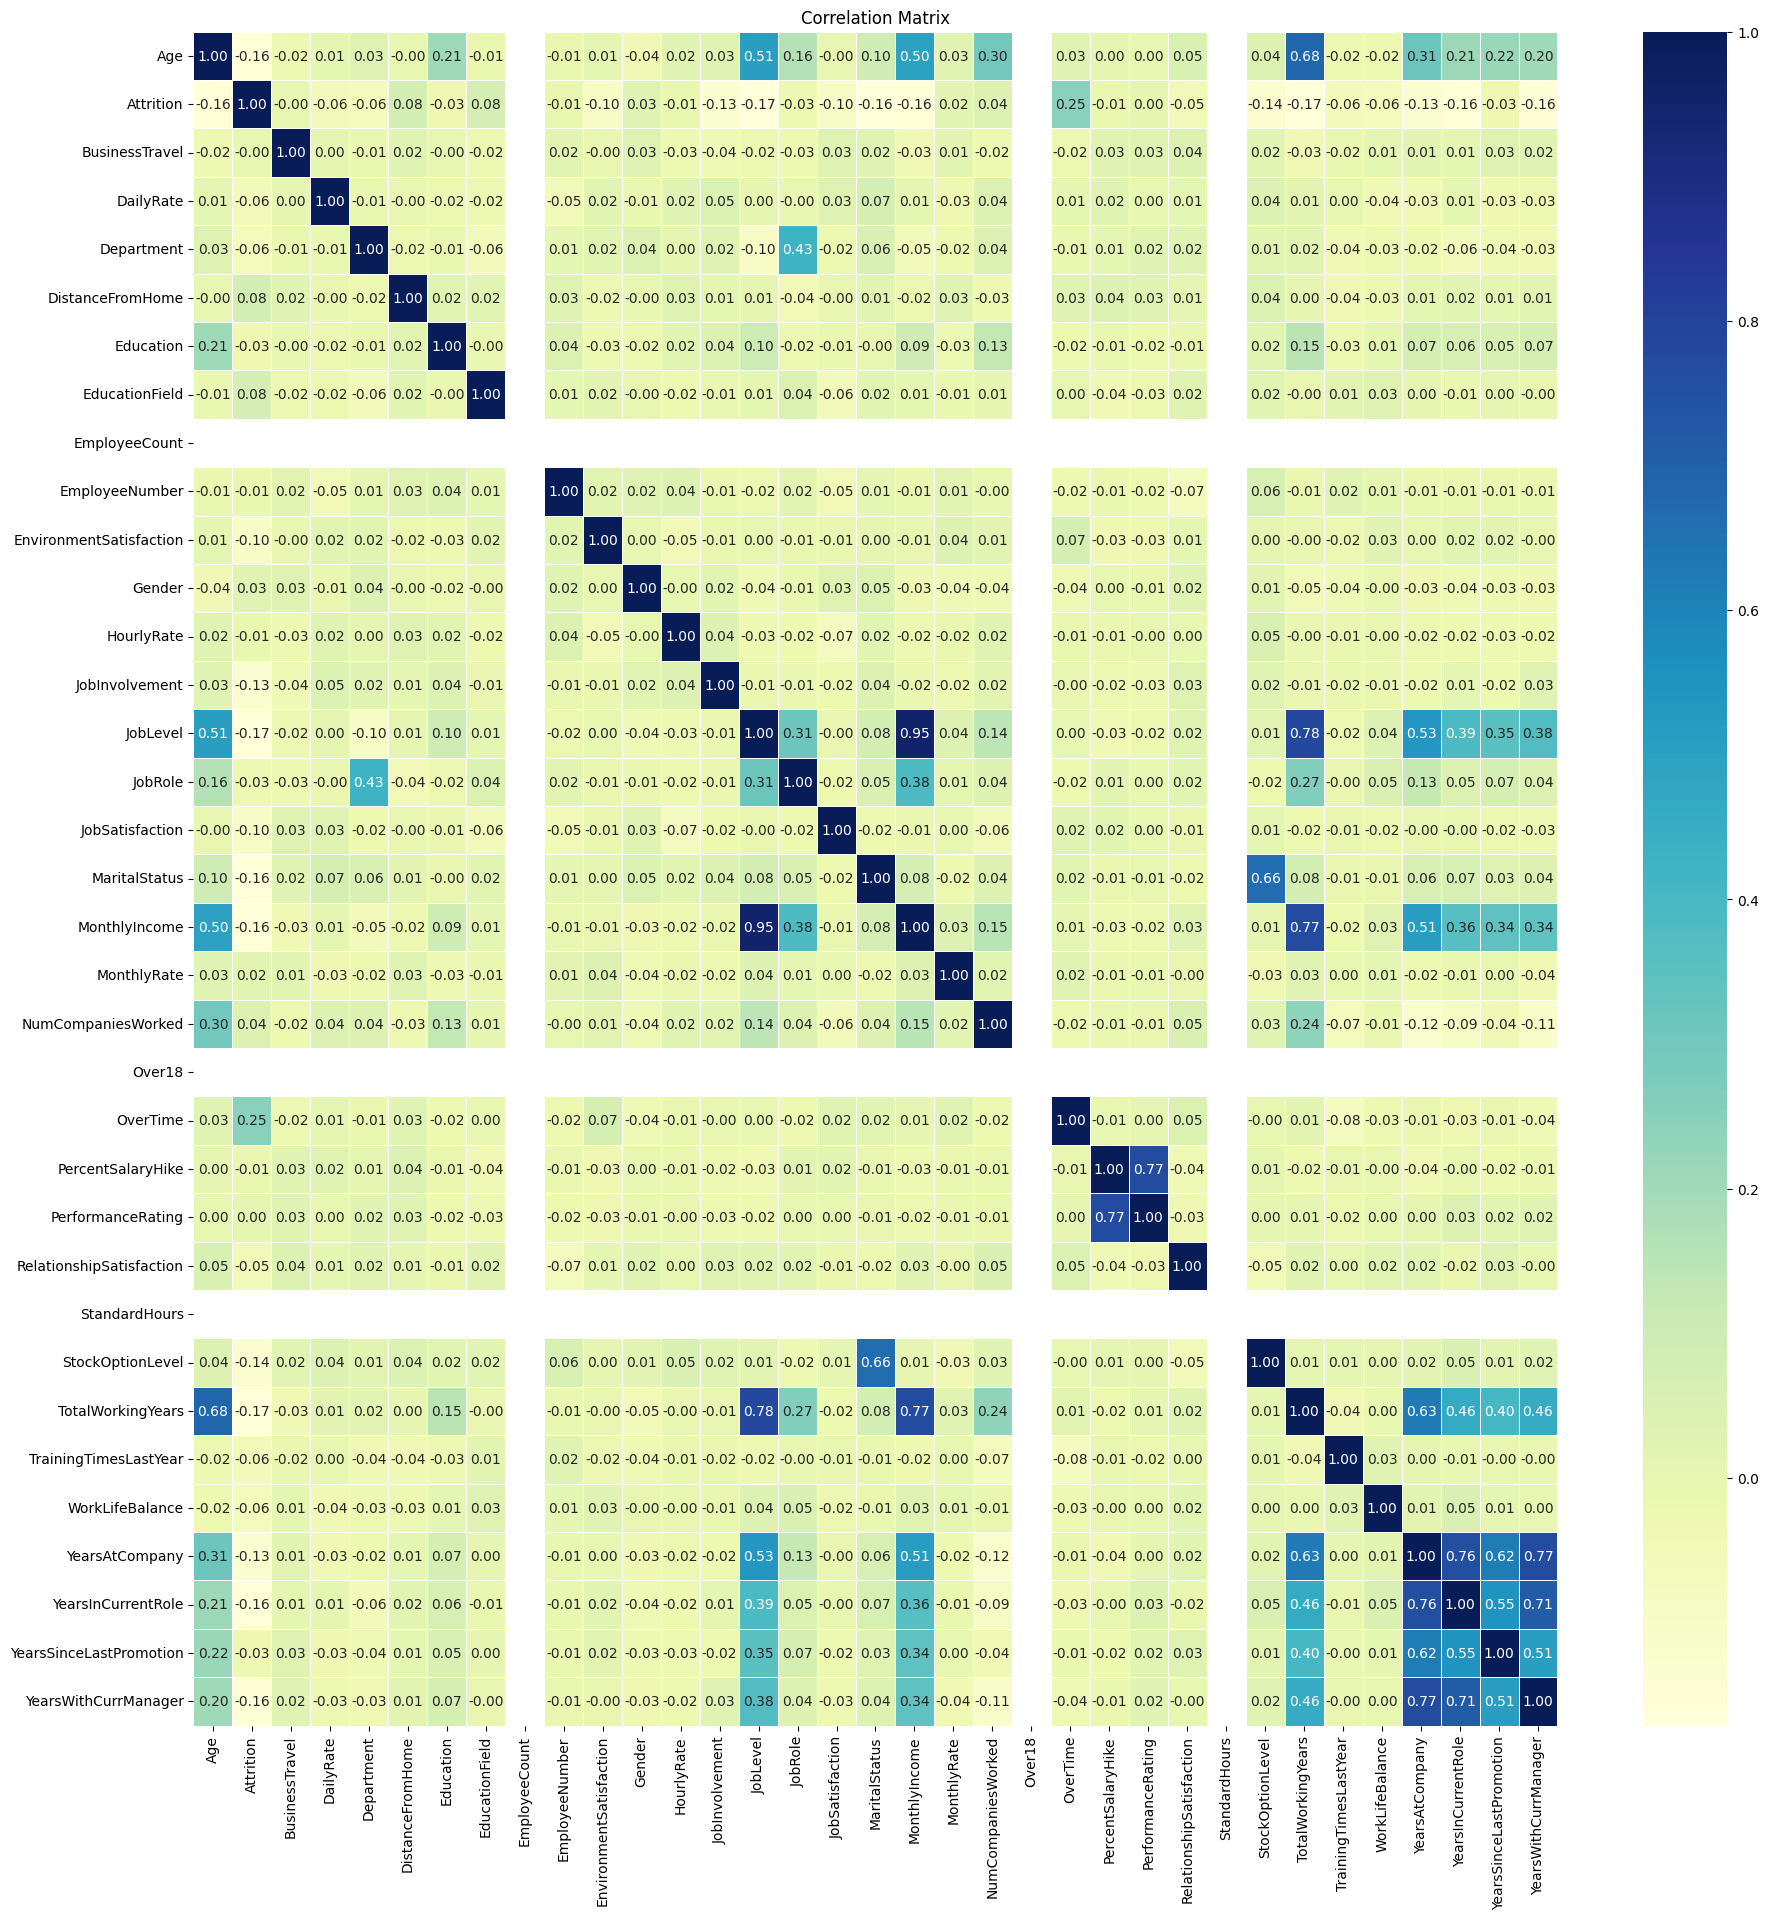

In [9]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Interpretation:
- **True Positives (TP):** The number of employees who were correctly predicted to leave. <br>
- **True Negatives (TN):** The number of employees who were correctly predicted to stay. <br>
- **False Positives (FP):** The number of employees who were incorrectly predicted to leave but actually stayed. <br>
- **False Negatives (FN):** The number of employees who were incorrectly predicted to stay but actually left. <br>

This matrix helps understand how well the model is performing in terms of correctly identifying employees who will leave versus those who will stay.

### Observations from the Correlation Matrix:
**1. Attrition:**
OverTime has a moderately positive correlation with Attrition (0.39), suggesting that employees working overtime are more likely to leave.
JobLevel and MonthlyIncome are slightly negatively correlated with Attrition (-0.16 and -0.17), indicating that higher job levels and salaries might reduce attrition risk. <br>
**2. High Correlations:**
MonthlyIncome and JobLevel have a strong positive correlation (0.95), suggesting that as job level increases, income rises significantly.
TotalWorkingYears is highly correlated with JobLevel (0.77), indicating a relationship between experience and promotion. <br>
**3. Other Factors:**
- YearsWithCurrentManager and YearsAtCompany are positively correlated (0.77), reflecting the stability of relationships with managers for long-tenured employees.
- JobSatisfaction and EnvironmentSatisfaction show weak correlations with Attrition, suggesting these factors may have a smaller direct influence on attrition.<br>

Overall, OverTime, Income, and JobLevel are the most notable factors influencing attrition.

---

## 3.5. Check for Class Imbalance in the Target Variable

In [10]:
# Define features (X) and target (y)
X = data.drop('Attrition', axis=1)  # Features (dropping the target column)
y = data['Attrition']  # Target

print(f"Class distribution in the target variable:\n{y.value_counts()}")

Class distribution in the target variable:
Attrition
0    1233
1     237
Name: count, dtype: int64


### Interpretation:
The target variable Attrition shows an imbalance:

- **0 (Stayed):** 1233 employees
- **1 (Left):** 237 employees
  
This indicates that the dataset is skewed toward employees who stayed (84% stayed, 16% left), which could cause machine learning models to be biased toward predicting that employees will stay. To address this imbalance, techniques like SMOTE (Synthetic Minority Over-sampling Technique), undersampling, or class weighting can be applied during model training to improve prediction accuracy for employees at risk of leaving.

---

### 3.6 Splitting the Data into Train and Test Sets

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Interpretation:
The dataset is split into training (80%) and test (20%) sets, ensures that the model can learn patterns from the majority of the data (who stays, who leaves) while holding back a portion to test its performance on unseen cases. This split helps simulate real-world performance, where accurately predicting which employees might leave is crucial for HR interventions. By evaluating the model on the test set, we ensure it generalizes well and doesn’t overfit to the training data alone.

In [12]:
# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Class distribution after SMOTE:\n{y_train_smote.value_counts()}")

Class distribution after SMOTE:
Attrition
0    978
1    978
Name: count, dtype: int64


### Interpretation:
The dataset shows a significant class imbalance in the target variable (Attrition), with around 83.88% of employees not leaving the company (No) and only 16.12% leaving (Yes).

**Why SMOTE is chosen:** <br>
SMOTE (Synthetic Minority Over-sampling Technique) is ideal for addressing class imbalance by generating synthetic samples for the minority class (Yes for attrition in this case) rather than simply duplicating existing instances. The imbalance in the dataset could lead to models being biased toward predicting the majority class (No for not leaving), resulting in poor performance in identifying employees who are likely to leave. By applying SMOTE, we ensure that the classifier sees enough instances of employees who leave, which improves the model's ability to generalize and accurately predict attrition. In summary, SMOTE is chosen to mitigate the impact of class imbalance, allowing the model to better capture patterns in the minority class and improve its predictive performance for employee attrition.

In [13]:
# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Interpretation:
This block scales the features using StandardScaler. Scaling ensures that all features are on the same scale, which is important for models like Logistic Regression, KNN, and SVC, which are sensitive to the range of the input features.

---

## 4. Model Evaluation
We will apply three models: Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC). The performance of each model will be evaluated using the following metrics:

- Confusion Matrix
- Precision, Recall, Accuracy, F1 score
- ROC curve and AUC
- Precision-Recall curve and AUC

## 4.1 Logistic Regression Model

In [14]:
# 1. Logistic Regression Hyperparameter Tuning
log_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2'],   # Regularization technique
    'solver': ['liblinear']  # Solver
}
log_grid = GridSearchCV(LogisticRegression(random_state=42), log_param_grid, cv=5, scoring='recall')
log_grid.fit(X_train_scaled, y_train_smote)
best_log_model = log_grid.best_estimator_

### Interpretation:

This block uses grid search to perform hyperparameter tuning for the Logistic Regression model. It optimizes the model by finding the best combination of the regularization strength parameter C and the L2 penalty, which helps control overfitting and improve model performance. The goal is to select the hyperparameters that maximize recall, ensuring the model captures as many employees at risk of leaving as possible.

In [15]:
# Logistic Regression
# Predictions
y_pred_log_best = best_log_model.predict(X_test_scaled)
y_prob_log_best = best_log_model.predict_proba(X_test_scaled)[:, 1]

### Interpretation:

This block generates predictions using the tuned Logistic Regression model. y_pred_log_best gives the predicted class labels (stay or leave), while y_prob_log_best provides the probability that each employee will leave. These results will be used to evaluate how well the model predicts employee attrition.

In [16]:
# Metrics
log_recall = recall_score(y_test, y_pred_log_best)
log_accuracy = accuracy_score(y_test, y_pred_log_best)
log_precision = precision_score(y_test, y_pred_log_best)
log_f1 = f1_score(y_test, y_pred_log_best)
log_roc_auc = roc_auc_score(y_test, y_prob_log_best)

print("Logistic Regression Metrics:")
print(f"Recall: {log_recall:.4f}")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"F1-score: {log_f1:.4f}")
print(f"ROC-AUC: {log_roc_auc:.4f}")

Logistic Regression Metrics:
Recall: 0.4872
Accuracy: 0.8129
Precision: 0.3519
F1-score: 0.4086
ROC-AUC: 0.7599


### Interpretation:

- **Recall (0.4872):** The model captures only 49% of employees who actually leave, meaning half of the employees at risk of leaving go undetected. In the context of employee retention, this is critical, as missing at-risk employees limits the company's ability to take preventive action.
- **Accuracy (0.8129):** The model correctly predicts attrition 81% of the time, but this could be skewed due to the imbalance in the dataset, where most employees stay. High accuracy does not necessarily reflect good performance in predicting leavers.
- **Precision (0.3519):** Only 35% of the employees predicted to leave actually do. This low precision indicates many false positives, where the model predicts employees will leave but they don’t. This could lead to unnecessary interventions and resource allocation.
- **F1-Score (0.4086):** The F1-score balances precision and recall, showing that the model has moderate success in handling both false positives and false negatives. A low F1-score reflects the challenge of effectively identifying employees at risk of leaving.
- **ROC-AUC (0.7599):** The ROC-AUC score suggests that the model has a reasonably good ability to distinguish between employees who will stay and those who will leave. This helps provide confidence that the model is capturing patterns related to attrition, though improvements can be made.

Confusion Matrix - Logistic Regression
[[220  35]
 [ 20  19]]


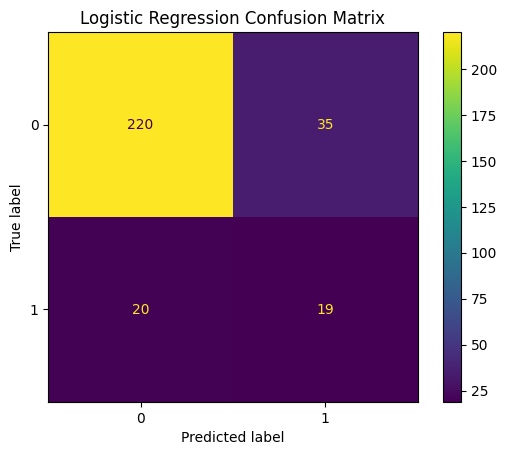

In [17]:
# Confusion Matrix
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_best))

# Plotting the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_log_best)
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic)
disp_log.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Interpretation:
The confusion matrix for Logistic Regression shows:

- **True Negatives (220):** The model correctly identified 220 employees who stayed with the company. This high value shows the model performs well in predicting employees who are not likely to leave.
- **False Positives (35):** The model incorrectly predicted that 35 employees would leave, but they actually stayed. In the context of employee retention, this means the company might waste resources on retention strategies for employees who were not at risk.
- **False Negatives (20):** The model missed 20 employees who actually left, predicting that they would stay. This is concerning because these employees could have been retained if the model had flagged them for intervention. In this business context, false negatives are more critical as they represent missed opportunities to retain valuable employees.
- **True Positives (19):** The model correctly identified 19 employees who left the company. This is the most important group in the context of attrition because predicting employees who leave allows the company to take proactive measures to improve retention.

In conclusion, improving recall is critical to ensure the model identifies more employees who are at risk of leaving, enabling the company to implement retention strategies more effectively.

In [18]:
# Classification Report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log_best))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       255
           1       0.35      0.49      0.41        39

    accuracy                           0.81       294
   macro avg       0.63      0.67      0.65       294
weighted avg       0.84      0.81      0.83       294



### Interpretation:
**1. Class 0 (Stayed):**
- **Precision:** 0.92 – The model accurately predicts employees who stay 92% of the time.
- **Recall:** 0.86 – It correctly identifies 86% of employees who stayed.
- **F1-Score:** 0.89 – Good balance between precision and recall for predicting employees who stayed.

**2. Class 1 (Left):**
- **Precision:** 0.35 – Only 35% of predicted leavers actually left.
- **Recall:** 0.49 – The model identifies 49% of employees who left.
- **F1-Score:** 0.41 – Moderate balance but needs improvement in identifying leavers.
- **Overall Accuracy:** 0.81 – The model correctly predicts 81% of cases. The weighted average (precision 0.84, recall 0.81) reflects the imbalance in the dataset, favoring predictions of employees who stay.

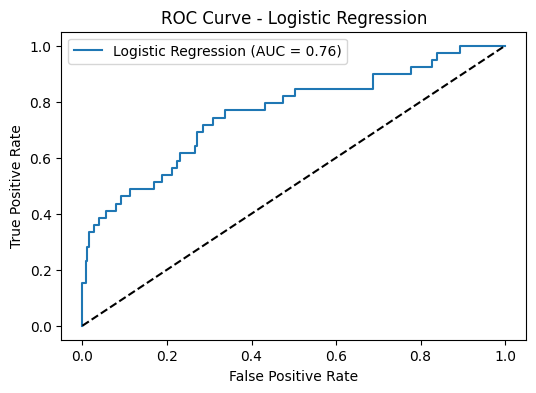

In [19]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### Interpretation:

- The ROC curve (Receiver Operating Characteristic) shows the model's ability to distinguish between employees who stay and those who leave.
- The curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.
- The AUC (Area Under the Curve) of 0.76 indicates that the model has a reasonably good ability to differentiate between employees who will stay and those who will leave. However, there is still room for improvement, as a perfect model would have an AUC of 1.0.

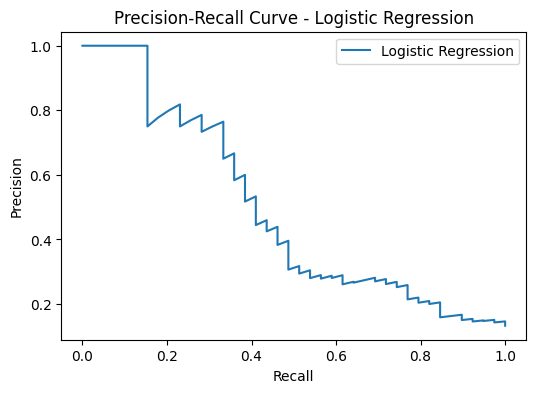

In [20]:
# Precision-Recall Curve
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log_best)
plt.figure(figsize=(6, 4))
plt.plot(recall_log, precision_log, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.show()

### Interpretation:

The Precision-Recall Curve in this graph visually illustrates how the model's performance changes as recall increases in the context of employee attrition:

- **High Precision, Low Recall:** Initially, the model has high precision when recall is low, meaning it is more accurate in predicting leavers but misses many actual at-risk employees. This reflects a situation where HR would identify a few leavers but with high confidence.
- **Precision Drop with Increased Recall:** As the model increases recall to identify more leavers, the precision drops significantly. This indicates that while the model captures more employees at risk of leaving, it generates many false positives—predicting many employees will leave when they actually won’t. For HR, this would mean wasted resources and efforts on retention measures for employees not truly at risk.
- **Implication for Attrition Management:** The steep drop in precision suggests the model struggles to maintain accuracy in identifying leavers without overestimating the number of at-risk employees. This imbalance poses a challenge for HR departments, where correctly identifying employees at risk of leaving is crucial but without triggering unnecessary interventions.

---

### 4.2. KNN Model:

In [21]:
# 2. K-Nearest Neighbors (KNN) Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='recall')
knn_grid.fit(X_train_scaled, y_train_smote)
best_knn_model = knn_grid.best_estimator_

### Interpretation:
This block performs hyperparameter tuning for K-Nearest Neighbors (KNN) to find the best settings for k (the number of neighbors) and distance metric. KNN is a distance-based algorithm, and the optimal parameters will be chosen based on maximizing recall.

In [22]:
# K-Nearest Neighbors (KNN)
# Predictions
y_pred_knn_best = best_knn_model.predict(X_test_scaled)
y_prob_knn_best = best_knn_model.predict_proba(X_test_scaled)[:, 1]

In [23]:
# Metrics
knn_recall = recall_score(y_test, y_pred_knn_best)
knn_accuracy = accuracy_score(y_test, y_pred_knn_best)
knn_precision = precision_score(y_test, y_pred_knn_best)
knn_f1 = f1_score(y_test, y_pred_knn_best)
knn_roc_auc = roc_auc_score(y_test, y_prob_knn_best)

print("\nK-Nearest Neighbors (KNN) Metrics:")
print(f"Recall: {knn_recall:.4f}")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"F1-score: {knn_f1:.4f}")
print(f"ROC-AUC: {knn_roc_auc:.4f}")


K-Nearest Neighbors (KNN) Metrics:
Recall: 0.5128
Accuracy: 0.7483
Precision: 0.2667
F1-score: 0.3509
ROC-AUC: 0.6858


### Interpretation:

The K-Nearest Neighbors (KNN) model shows:

- **Recall (0.5128):** The model identifies 51% of employees who will leave, which is a moderate performance in capturing at-risk employees.
- **Accuracy (0.7483):** The model correctly predicts outcomes 74.83% of the time, reflecting a fair overall performance.
- **Precision (0.2667):** Low precision means that only 27% of predicted leavers actually leave, leading to many false positives.
- **F1-Score (0.3509):** Shows a moderate balance between precision and recall, but there is room for improvement.
- **ROC-AUC (0.6858):** Indicates moderate ability to distinguish between employees who will stay and those who will leave.

In the context of attrition, recall is most critical. It’s essential to capture as many at-risk employees as possible, even if precision suffers slightly.

Confusion Matrix - KNN
[[200  55]
 [ 19  20]]


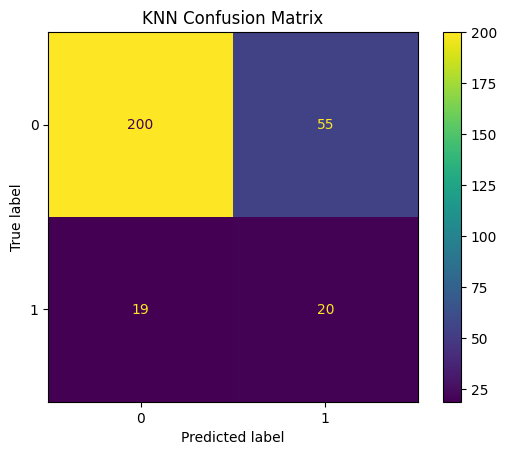

In [24]:
# Confusion Matrix for KNN
print("Confusion Matrix - KNN")
print(confusion_matrix(y_test, y_pred_knn_best))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp_log.plot()
plt.title("KNN Confusion Matrix")
plt.show()

### Interpretation:

The confusion matrix for KNN shows:
- **True Negatives (200):** The model correctly predicted 200 employees would stay.
- **False Positives (55):** The model incorrectly predicted that 55 employees would leave when they stayed.
- **False Negatives (19):** The model missed 19 employees who actually left but were predicted to stay.
- **True Positives (20):** The model correctly predicted 20 employees who left.

The KNN model performs better at predicting who stays (high true negatives), but struggles with false positives (predicting employees will leave when they don’t) and misses a considerable number of actual leavers (false negatives). In the context of attrition, missing employees at risk of leaving (false negatives) is a critical issue that needs improvement.

In [25]:
# Classification Report for KNN
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn_best))

Classification Report - KNN
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       255
           1       0.27      0.51      0.35        39

    accuracy                           0.75       294
   macro avg       0.59      0.65      0.60       294
weighted avg       0.83      0.75      0.78       294



### Interpretation:

**1. Class 0 (Stayed):**
- **Precision:** 0.91 – The model is accurate in predicting employees who stay.
- **Recall:** 0.78 – It correctly identifies 78% of employees who stay.
- **F1-Score:** 0.84 – Strong balance between precision and recall for staying predictions.
  
**2. Class 1 (Left):**
- **Precision:** 0.27 – Only 27% of predicted leavers actually leave.
- **Recall:** 0.51 – The model identifies 51% of employees who leave.
- **F1-Score:** 0.35 – Moderate balance but needs improvement for identifying leavers.
  
**3. Accuracy (0.75):** The model correctly predicts 75% of cases, but struggles with identifying employees at risk of leaving.

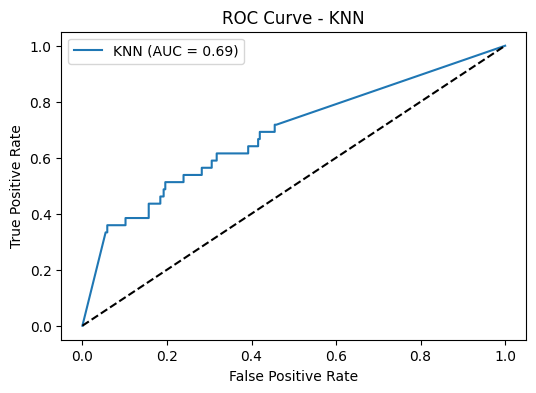

In [26]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

### Interpretation:
- The ROC curve plots the model's ability to distinguish between true positives (employees who leave) and false positives (employees incorrectly predicted to leave).
- The AUC (Area Under the Curve) is 0.69, which suggests that the model has a fair ability to distinguish between employees who will stay and those who will leave.
- This score indicates moderate performance, but there is considerable room for improvement, as an AUC closer to 1.0 would indicate a better model.
  
The model may struggle with correctly identifying employees at risk of leaving.

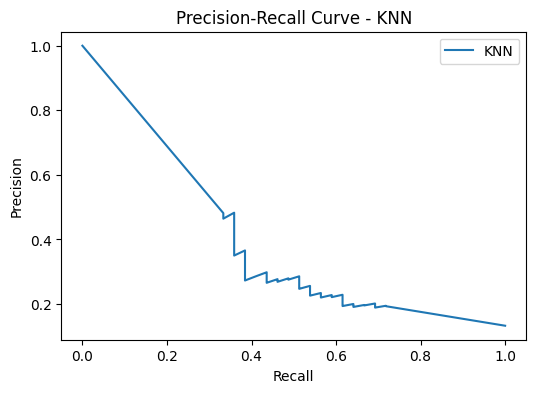

In [27]:
# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn_best)
plt.figure(figsize=(6, 4))
plt.plot(recall_knn, precision_knn, label="KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - KNN")
plt.legend()
plt.show()

### Interpretation:
- **High Precision at Low Recall:** When recall is low (i.e., the model captures fewer employees at risk of leaving), precision is high, meaning most of the employees predicted to leave actually do leave. This suggests that when the model is conservative in its predictions, it is accurate in identifying leavers.
- **Sharp Decline in Precision:** As recall increases, precision drops significantly. This indicates that as the model tries to capture more employees who leave, it begins to predict many false positives (employees predicted to leave but actually stay). For example, at a recall level around 0.5, precision drops below 0.3, meaning less than 30% of employees predicted to leave actually do.
- **Implications for Employee Attrition:** In the context of attrition, this trade-off suggests that while the model can catch more leavers by increasing recall, it does so at the expense of accuracy (precision). For HR teams, this means that as the model tries to capture more at-risk employees, it may flag too many employees who are not actually planning to leave, resulting in unnecessary interventions and wasted resources.
- **Overall Model Performance:** The steep slope of the curve indicates that the model struggles to maintain a balance between precision and recall. It is difficult for the KNN model to identify a large number of at-risk employees without generating a significant number of false positives.

In summary, the KNN model's precision-recall trade-off is problematic in the context of predicting employee attrition, where the cost of false positives (unnecessary retention efforts) can be high. Further tuning or using a different model might be required to improve this balance.

---

## 4.3. SVC model 

In [28]:
# 3. SVC Hyperparameter Tuning
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(SVC(probability=True, random_state=42), svc_param_grid, cv=5, scoring='recall')
svc_grid.fit(X_train_scaled, y_train_smote)
best_svc_model = svc_grid.best_estimator_

# Print the best parameters for each model
print(f"Best parameters for Logistic Regression: {log_grid.best_params_}")
print(f"Best parameters for KNN: {knn_grid.best_params_}")
print(f"Best parameters for SVC: {svc_grid.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for SVC: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


### Interpretation:
This block performs hyperparameter tuning for Support Vector Classifier (SVC), which works by finding the optimal boundary (hyperplane) between employees who stay and those who leave. The goal of the tuning process is to maximize recall, ensuring that the model captures as many employees at risk of leaving as possible.

The kernel in a Support Vector Classifier (SVC) defines the method the algorithm uses to project data into a higher-dimensional space where it can more easily find a hyperplane to separate classes. Different kernels, such as linear, rbf (Radial Basis Function), and poly (polynomial), apply different transformations:
- **Linear Kernel:** For linearly separable data.
- **RBF Kernel:** For non-linear relationships; maps data into a higher dimension.
- **Polynomial Kernel:** Applies a polynomial function to the data, useful for more complex relationships.

In [29]:
# Predictions
y_pred_svc_best = best_svc_model.predict(X_test_scaled)
y_prob_svc_best = best_svc_model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# Metrics
svc_recall = recall_score(y_test, y_pred_svc_best)
svc_accuracy = accuracy_score(y_test, y_pred_svc_best)
svc_precision = precision_score(y_test, y_pred_svc_best)
svc_f1 = f1_score(y_test, y_pred_svc_best)
svc_roc_auc = roc_auc_score(y_test, y_prob_svc_best)

print("\nSupport Vector Classifier (SVC) Metrics:")
print(f"Recall: {svc_recall:.4f}")
print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {svc_precision:.4f}")
print(f"F1-score: {svc_f1:.4f}")
print(f"ROC-AUC: {svc_roc_auc:.4f}")


Support Vector Classifier (SVC) Metrics:
Recall: 0.6923
Accuracy: 0.6224
Precision: 0.2143
F1-score: 0.3273
ROC-AUC: 0.7224


### Interpretation:

The Support Vector Classifier (SVC) model performs as follows:
- **Recall (0.6923):** The model identifies about 69% of employees at risk of leaving, making it fairly effective in capturing true leavers.
- **Accuracy (0.6224):** The overall accuracy is 62.24%, reflecting that the model makes correct predictions in about two-thirds of the cases.
- **Precision (0.2143):** Low precision indicates that many of the employees predicted to leave actually stay, resulting in a high number of false positives.
- **F1-Score (0.3273):** Shows a weak balance between precision and recall.
- **ROC-AUC (0.7224):** The model has a moderate ability to distinguish between leavers and stayers.

[[156  99]
 [ 12  27]]


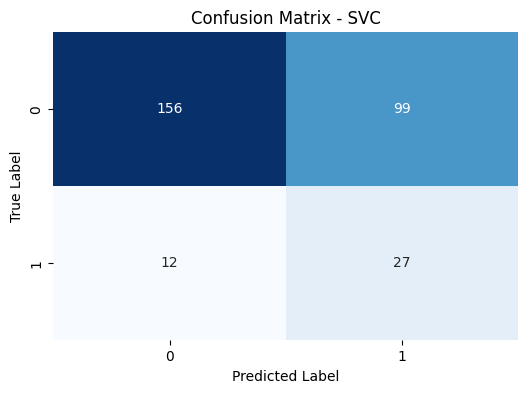

In [31]:
# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc_best)
print(confusion_matrix(y_test, y_pred_svc_best))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretation:

The confusion matrix for SVC shows:
- **True Negatives (156):** The model correctly predicted 156 employees would stay.
- **False Positives (99):** The model incorrectly predicted that 99 employees would leave when they stayed.
- **False Negatives (12):** The model missed 12 employees who actually left but were predicted to stay.
- **True Positives (27):** The model correctly predicted 27 employees would leave.

The SVC model is moderately effective at identifying employees who leave (27 true positives) but struggles with false positives (99). It correctly identifies many employees who stay but misclassifies many as at risk of leaving. Improving precision could help reduce these false positives.

In [32]:
# Classification Report for SVC
print("Classification Report - SVC")
print(classification_report(y_test, y_pred_svc_best))

Classification Report - SVC
              precision    recall  f1-score   support

           0       0.93      0.61      0.74       255
           1       0.21      0.69      0.33        39

    accuracy                           0.62       294
   macro avg       0.57      0.65      0.53       294
weighted avg       0.83      0.62      0.68       294



### Interpretation:

**1. Class 0 (Stayed):**
- **Precision:** 0.93 – The model accurately predicts stayers 93% of the time.
- **Recall:** 0.61 – It correctly identifies 61% of those who stayed.
- **F1-Score:** 0.74 – Good balance between precision and recall for this class.
  
**2. Class 1 (Left):**
- **Precision:** 0.21 – Low precision indicates many false positives.
- **Recall:** 0.69 – It identifies 69% of employees who leave.
- **F1-Score:** 0.33 – Poor balance between precision and recall.

**3. Accuracy (0.62):** The model correctly predicts 62% of cases, but struggles with low precision for predicting leavers.

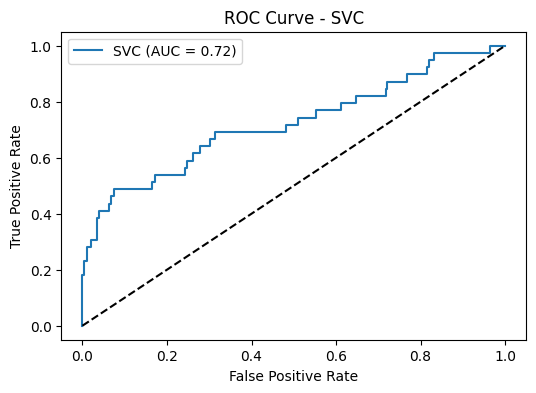

In [33]:
# Evaluate Model Performance - Confusion Matrix, ROC Curve, Precision-Recall Curve
# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {svc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend()
plt.show()

### Interpretation:

- **AUC (0.72):** The Area Under the Curve (AUC) score of 0.72 shows that the SVC model has a moderate ability to separate employees who will stay from those who will leave. An AUC closer to 1.0 indicates a better-performing model, so while this score is above average, there is room for improvement.
- **True Positive Rate (Recall):** The curve represents the trade-off between capturing more true positives (employees who leave) and increasing false positives (incorrectly predicting that employees will leave when they stay). As the curve moves upward, it captures more leavers, but it also increases the number of false positives.
- **Diagonal Line Comparison:** The dashed diagonal line represents a model that performs no better than random guessing (AUC = 0.5). Since the curve is above the diagonal, the model performs better than random, but it still allows for a significant number of false positives and false negatives, indicating a need for tuning.
- **Interpretation for Attrition:** In the context of employee attrition, a model with an AUC of 0.72 suggests that while the SVC can identify a fair number of employees who are likely to leave, it may also flag many employees who are not actually at risk. For HR teams, this can mean unnecessary retention efforts on employees who were never going to leave, which emphasizes the need for improving precision.

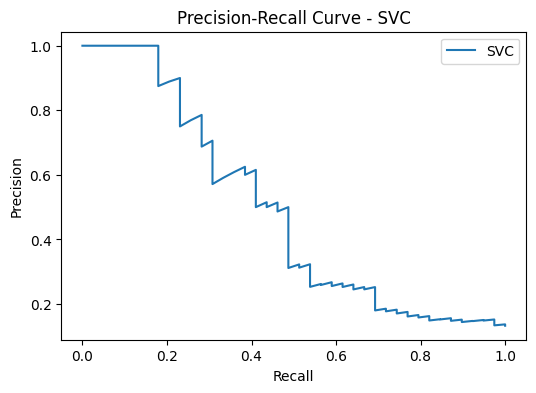

In [34]:
# Precision-Recall Curve
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_prob_svc_best)
plt.figure(figsize=(6, 4))
plt.plot(recall_svc, precision_svc, label="SVC")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVC")
plt.legend()
plt.show()

### Interpretation:
- The Precision-Recall Curve shows a significant drop in precision as recall increases. Initially, precision is high, but as the model tries to capture more true leavers (increasing recall), precision declines rapidly.
- This means that while the model identifies more at-risk employees (high recall), it incorrectly predicts many who will stay, reducing precision.
  
In summary, the SVC model struggles to maintain a balance between precision and recall, leading to many false positives as recall increases.

---

### 5. False Positives and False Negatives
**Business Problem:**
Employee attrition is a costly issue for companies. High turnover leads to productivity loss, increased recruitment expenses, and a negative impact on team morale. The goal is to predict which employees are likely to leave, enabling HR to take preemptive action to improve retention rates. Identifying at-risk employees allows organizations to reduce these negative outcomes and better allocate retention resources.

#### Importance of False Positives (FP) and False Negatives (FN):
- **False Positives (FP):** Predicting an employee will leave when they won’t is a false positive. This could lead to unnecessary interventions (bonuses, promotions, or special incentives) for employees who were never at risk of leaving. While this wastes company resources, it's less damaging than missing someone who actually leaves. Precision becomes important here, as it tells how many predictions of leavers are truly correct.
- **False Negatives (FN):** Predicting that an employee will stay when they actually leave is a false negative. This is much more critical than false positives because the company loses talent without the chance to intervene. High recall is necessary to ensure that most at-risk employees are captured and HR can act to retain them. In the context of attrition, false negatives are highly detrimental because they represent lost opportunities to prevent turnover.
- **Precision:** Precision measures how many of the predicted leavers are actual leavers. High precision reduces false positives and minimizes the risk of wasted resources on employees who weren’t at risk of leaving. In a business setting, high precision ensures targeted and efficient retention efforts, but focusing only on precision can miss real leavers.
- **Recall:** Recall measures how many actual leavers were correctly identified. In the context of attrition, high recall is critical because the goal is to identify as many at-risk employees as possible. Missing these employees (false negatives) is costly for the business. Prioritizing recall ensures that more employees who may leave are identified for intervention.
- **F1-Score:** The F1-score balances precision and recall, providing an overall measure of model performance. In a business context, it is important to have a balance between identifying as many leavers as possible (recall) and avoiding unnecessary retention efforts (precision). The F1-score is useful for understanding how well a model can handle the trade-offs between false positives and false negatives.

### Observations:
For a company, false negatives (FN) are typically costlier. This occurs when the model fails to predict that an employee will leave, and the company misses the chance to intervene. Losing valuable employees can result in high recruitment and training costs, lost productivity, and a negative impact on team dynamics. On the other hand, while false positives (FP) (predicting an employee will leave when they won’t) lead to unnecessary retention efforts, the financial and operational consequences of unaddressed turnover are generally much higher.

---

### 6. Recommendations
- **Logistic Regression:** This model offers the best balance between precision and recall, making it the most suitable for identifying employees at risk of leaving while minimizing false positives. It is recommended for providing actionable insights for HR teams to take proactive measures in retaining key employees.

- **KNN:** While improving recall slightly, KNN sacrifices too much precision, leading to excessive false positives and unnecessary retention efforts. It's less practical for the business goal of efficient resource allocation.

- **SVC:** Although SVC has a high recall, it results in too many false positives due to low precision, leading to excessive resource use. It's not recommended unless optimized for precision.

### Conclusion:
When evaluating the performance of the three models—Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC)—a clear narrative emerges regarding their strengths and weaknesses:
- **Logistic Regression** strikes the best balance between precision, recall, and overall performance, with an AUC of 0.76 and reasonable F1-score. It captures both leavers and stayers with fewer false positives, making it the most reliable model for predicting employee attrition while minimizing unnecessary retention efforts.
- **SVC** demonstrates strong recall (0.69) but suffers from low precision (0.21), meaning that while it identifies more at-risk employees, it incorrectly flags a large number of employees who are not at risk. This can lead to wasted resources and false alarms. Although its AUC of 0.72 is decent, its precision is too low to recommend for this problem.
- **KNN**, though it captures about half of the leavers (recall of 0.51), has lower precision (0.27) and overall performance, reflected in its lower AUC of 0.69. It suffers from both false positives and false negatives, making it the weakest performer among the three models.

#### Final Conclusion:
**Logistic Regression** is the most suitable model for predicting employee attrition. It provides the best trade-off between capturing at-risk employees and minimizing incorrect predictions, making it the most practical choice for HR teams looking to take proactive measures in retaining employees.